In [ ]:
import pandas as pd
import numpy as np


file_path = 'indiancrop_datasetwith_via.xlsx'


df = pd.read_excel(file_path)

In [ ]:
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP,DESTINATION,DISTANCE,VIA1,VIA2,VIA3
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice,Andhra Pradesh,2150,Port Blair,Chennai,Visakhapatnam
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice,Andhra Pradesh,1780,Port Blair,Chennai,Vijayawada
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice,Tamil Nadu,1700,Port Blair,Chennai,Madurai
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice,West Bengal,2700,Port Blair,Chennai,Kolkata
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice,Andhra Pradesh,1780,Port Blair,Chennai,Vijayawada


In [ ]:
df.tail()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP,DESTINATION,DISTANCE,VIA1,VIA2,VIA3
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee,Odisha,490,Kolkata,Kharagpur,Bhubaneswar
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee,Odisha,490,Kolkata,Kharagpur,Bhubaneswar
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee,Odisha,490,Kolkata,Kharagpur,Bhubaneswar
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee,Odisha,490,Kolkata,Kharagpur,Bhubaneswar
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,West Bengal,1400,Coffee,Odisha,490,Kolkata,Kharagpur,Bhubaneswar


In [ ]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
DESTINATION    0
DISTANCE       0
VIA1           1
VIA2           1
VIA3           1
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df[['N_SOIL', 'P_SOIL', 'K_SOIL', 'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL']]
y = df['CROP']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

#
accuracy1 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy1))
print("Classification Report:\n", report)

Accuracy: 99.32%
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.96      0.98        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters for grid search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the number of neighbors
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # Choose between Manhattan and Euclidean distance
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model from grid search
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score: 0.9812419062419064
Accuracy: 0.9727272727272728


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


y_pred = nb_model.predict(X_test)


accuracy2 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy2))
print("Classification Report:\n", report)

Accuracy: 99.55%
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       1.00      1.00      1.00        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      1.00      1.00        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)


accuracy3 = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2%}".format(accuracy3))
print("Classification Report:\n", report)

Accuracy: 98.64%
Classification Report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       0.96      1.00      0.98        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      0.96      0.94        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1

In [ ]:


test_data = {
    'N_SOIL': [50],
    'P_SOIL': [25],
    'K_SOIL': [30],
    'TEMPERATURE': [25],
    'HUMIDITY': [60],
    'ph': [6.5],
    'RAINFALL': [100]
}


df_test = pd.DataFrame(test_data)


predictions = rf_model.predict(df_test)


print("Predicted Crop:", predictions)

Predicted Crop: ['Mango']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_excel('/content/indiancrop_datasetwith_via.xlsx')

# Drop rows with missing values
data.dropna(inplace=True)

# Separate features and target variable
X = data[['HUMIDITY', 'K_SOIL', 'N_SOIL', 'P_SOIL', 'ph', 'RAINFALL', 'TEMPERATURE']]
y = data['CROP']

# Convert target variable to numerical labels (assuming it's categorical)
# You might need to use label encoding or one-hot encoding depending on your data
# For example, using label encoding:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/100
55/55 [==============================] - 3s 4ms/step - loss: 3.0365 - accuracy: 0.1649
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 2.8248 - accuracy: 0.5190
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 2.4045 - accuracy: 0.6072
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 1.8572 - accuracy: 0.6350
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 1.3677 - accuracy: 0.7294
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 1.0265 - accuracy: 0.7857
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.8001 - accuracy: 0.8437
Epoch 8/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.8920
Epoch 9/100
55/55 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.9034
Epoch 10/100
55/55 [==============================] - 0s 5ms/step - loss: 0.4536 - accuracy: 0.9221
Epoch 11/

In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_excel('indiancrop_datasetwith_via.xlsx')

data = data[['N_SOIL', 'P_SOIL', 'K_SOIL',
             'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP']]

print(data.head())
# Extract features and labels

features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

# Use LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training features
features_scaled = scaler.fit_transform(features)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels_encoded, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,
          input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=len(np.unique(labels)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test))

# Example new data point for prediction with 6 features
# Replace with your actual values
new_data_point = np.array([[80, 50, 42, 22.5, 75.0, 6.8, 3]])

# Normalize the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data_point)

# Reshape the new data for LSTM input
new_data_reshaped = np.reshape(
    new_data_scaled, (1, 1, new_data_scaled.shape[1]))

# Make prediction
prediction = model.predict(new_data_reshaped)

# Decode the predicted label
predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

print("Predicted Crop:", predicted_label[0])

   N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  CROP
0      90      42      43    20.879744  82.002744  6.502985  202.935536  Rice
1      85      58      41    21.770462  80.319644  7.038096  226.655537  Rice
2      60      55      44    23.004459  82.320763  7.840207  263.964248  Rice
3      74      35      40    26.491096  80.158363  6.980401  242.864034  Rice
4      78      42      42    20.130175  81.604873  7.628473  262.717340  Rice
Epoch 1/50
55/55 [==============================] - 5s 22ms/step - loss: 3.0847 - accuracy: 0.1301 - val_loss: 3.0747 - val_accuracy: 0.1614
Epoch 2/50
55/55 [==============================] - 0s 5ms/step - loss: 3.0184 - accuracy: 0.1517 - val_loss: 2.9174 - val_accuracy: 0.1136
Epoch 3/50
55/55 [==============================] - 0s 5ms/step - loss: 2.6355 - accuracy: 0.1670 - val_loss: 2.3479 - val_accuracy: 0.2250
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 2.0058 - accuracy: 0.4369 - val_loss: 1

In [ ]:
# from sklearn.metrics import adjusted_rand_score, make_scorer, accuracy_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.cluster import AgglomerativeClustering


# param_grid = {
#     'n_clusters': [2, 3, 4, 5, 6],

#     'linkage': ['complete', 'average', 'single']
# }


# model = AgglomerativeClustering()


# grid_search = GridSearchCV(
#     model, param_grid, scoring='adjusted_rand_score', cv=5, n_jobs=-1)


# grid_search.fit(X_train)


# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_


# best_model.fit(X_train)


# best_labels = best_model.labels_
# best_ari_score = adjusted_rand_score(y_train, best_labels)


# accuracy = accuracy_score(y_train, best_labels)

# print("Best Parameters: ", best_params)
# print("Best Adjusted Rand Index (ARI): ", best_ari_score)
# print("Accuracy Score: {:.2%}".format(accuracy))

ValueError: 
All the 75 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py", line 955, in fit
    X = self._validate_data(X, ensure_min_samples=2)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 915, in check_array
    raise ValueError(
ValueError: Found array with dim 3. AgglomerativeClustering expected <= 2.


In [ ]:
# Ant colony
import pandas as pd



import numpy as np



file_path = 'indiancrop_datasetwith_via.xlsx'



df = pd.read_excel(file_path)



selected_columns = ['STATE', 'CROP_PRICE', 'CROP',



                    'DESTINATION', 'DISTANCE', "VIA1", "VIA2", "VIA3"]



filtered_df = df[selected_columns]



desired_state = 'Gujarat'



desired_crop = 'Maize'



filtered_df = df.loc[(df['STATE'] == desired_state) & (



    df['CROP'] == desired_crop), selected_columns]



result_df = filtered_df.groupby(



    ['STATE', 'DESTINATION', "DISTANCE", "CROP", "VIA1", "VIA2", "VIA3"], as_index=False)['CROP_PRICE'].mean()



data = result_df



np_data = np.array([data['CROP_PRICE'], data['DISTANCE']]).T



n_ants = 5



n_iterations = 100



decay = 0.6



alpha = 1.0



beta = 2.0



pheromone = np.ones(len(np_data))



best_solution_index = -1


best_solution_distance = float('inf')


best_solution_price = float('inf')



best_solution_vias = []



for i in range(n_iterations):

    ants = np.zeros((n_ants, len(np_data)), dtype=int)


    for ant in range(n_ants):

        for j in range(len(np_data)):

            choices = np.delete(np.arange(len(np_data)), ants[ant, :j])

            probabilities = (pheromone[choices] ** alpha) * \
                ((1.0 / np_data[choices][:, 1]) ** beta)

            probabilities /= probabilities.sum()


            selected_index = np.random.choice(choices, p=probabilities)

            ants[ant, j] = selected_index


    pheromone *= (1.0 - decay)

    for ant in range(n_ants):

        for j in range(len(np_data) - 1):

            pheromone[ants[ant, j]] += 1.0 / np_data[ants[ant, j], 0]


    min_distance_index = np.argmin(np_data[:, 1])

    current_solution_distance = np_data[min_distance_index, 1]

    current_solution_price = np_data[min_distance_index, 0]


    if current_solution_distance < best_solution_distance:


        best_solution_distance = current_solution_distance


        best_solution_price = current_solution_price

        best_solution_index = min_distance_index

        best_solution_vias = data.loc[best_solution_index, [



            "VIA1", "VIA2", "VIA3"]].values.tolist()



print("Best Solution:")



print("Destination:", data.loc[best_solution_index, "DESTINATION"])



print("Distance:", best_solution_distance)



print("Price:", best_solution_price)



print("Vias:", best_solution_vias)

Best Solution:
Destination: Rajasthan
Distance: 430.0
Price: 2817.6451612903224
Vias: ['Ahmedabad', 'Vadodara', 'Udaipur']


In [ ]:
# artifical bee colony
import pandas as pd


import numpy as np



file_path = 'indiancrop_datasetwith_via.xlsx'


df = pd.read_excel(file_path)



selected_columns = ['STATE', 'CROP_PRICE', 'CROP',


                    'DESTINATION', 'DISTANCE', "VIA1", "VIA2", "VIA3"]


filtered_df = df[selected_columns]



desired_state = 'Gujarat'


desired_crop = 'Maize'



filtered_df = df.loc[(df['STATE'] == desired_state) & (


    df['CROP'] == desired_crop), selected_columns]



result_df = filtered_df.groupby(


    ['STATE', 'DESTINATION', "DISTANCE", "CROP", "VIA1", "VIA2", "VIA3"], as_index=False)['CROP_PRICE'].mean()


data = result_df



np_data = np.array([data['CROP_PRICE'], data['DISTANCE']]).T



n_bees = 5


n_iterations = 100


limit = 100


lower_bound = 0


upper_bound = len(np_data)



best_solution_index = -1


best_solution_distance = float('inf')


best_solution_price = float('inf')


best_solution_vias = []



for iteration in range(n_iterations):


    for bee in range(n_bees):


        current_solution_index = np.random.randint(lower_bound, upper_bound)


        current_solution_distance = np_data[current_solution_index, 1]


        current_solution_price = np_data[current_solution_index, 0]


        if current_solution_distance < best_solution_distance:
            best_solution_distance = current_solution_distance
            best_solution_price = current_solution_price


            best_solution_index = current_solution_index


            best_solution_vias = data.loc[best_solution_index, [


                "VIA1", "VIA2", "VIA3"]].values.tolist()


    if np.random.rand() < 1.0 / (1 + best_solution_distance):


        best_solution_index = np.random.randint(lower_bound, upper_bound)


        best_solution_distance = np_data[best_solution_index, 1]


        best_solution_price = np_data[best_solution_index, 0]


        best_solution_vias = data.loc[best_solution_index, [


            "VIA1", "VIA2", "VIA3"]].values.tolist()


    print(f"Iteration {iteration + 1}/{n_iterations}: Best Distance = {best_solution_distance}, Best Price = {best_solution_price}")



print("Best Solution:")


print("Destination:", data.loc[best_solution_index, "DESTINATION"])


print("Distance:", best_solution_distance)


print("Price:", best_solution_price)


print("Vias:", best_solution_vias)

Iteration 1/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 2/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 3/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 4/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 5/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 6/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 7/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 8/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 9/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 10/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 11/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 12/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 13/100: Best Distance = 430.0, Best Price = 2817.6451612903224
Iteration 14/100: Best Distance = 430.0, Best Price = 2817.6

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# artifical bee colony
file_path = 'indiancrop_datasetwith_via.xlsx'
df = pd.read_excel(file_path)


selected_columns = ['STATE', 'CROP_PRICE', 'CROP',
                    'DESTINATION', 'DISTANCE', "VIA1", "VIA2", "VIA3"]
filtered_df = df[selected_columns]


desired_state = 'Gujarat'
desired_crop = 'Maize'


filtered_df = df.loc[(df['STATE'] == desired_state) & (
    df['CROP'] == desired_crop), selected_columns]


result_df = filtered_df.groupby(
    ['STATE', 'DESTINATION', "DISTANCE", "CROP", "VIA1", "VIA2", "VIA3"], as_index=False)['CROP_PRICE'].mean()


data = result_df


np_data = np.array([data['CROP_PRICE'], data['DISTANCE']]).T


def objective_function(params):
    distance, price = params
    return distance + price


bounds = [(np_data[:, 1].min(), np_data[:, 1].max()),
          (np_data[:, 0].min(), np_data[:, 0].max())]


result = minimize(objective_function, x0=[np_data[:, 1].mean(
), np_data[:, 0].mean()], bounds=bounds, method='L-BFGS-B')


best_solution_distance, best_solution_price = result.x
best_solution_index = np.argmin(np.sqrt(
    (np_data[:, 1] - best_solution_distance)**2 + (np_data[:, 0] - best_solution_price)**2))
best_solution_vias = data.loc[best_solution_index, [
    "VIA1", "VIA2", "VIA3"]].values.tolist()


print("Best Solution:")
print("Destination:", data.loc[best_solution_index, "DESTINATION"])
print("Distance:", best_solution_distance)
print("Price:", best_solution_price)
print("Vias:", best_solution_vias)

Best Solution:
Destination: Madhya Pradesh
Distance: 430.0
Price: 1525.0
Vias: ['Ahmedabad', 'Ujjain', 'Indorew']


In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_excel('indiancrop_datasetwith_via.xlsx')

data = data[['N_SOIL', 'P_SOIL', 'K_SOIL',
             'TEMPERATURE', 'HUMIDITY', 'ph', 'RAINFALL', 'CROP']]

print(data.head())


features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

scaler = MinMaxScaler(feature_range=(0, 1))


features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, labels_encoded, test_size=0.2, random_state=42)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(units=50, return_sequences=True,
          input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=len(np.unique(labels)), activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=50, batch_size=32,
          validation_data=(X_test, y_test))

new_data_point = np.array([[94, 39, 18, 23.89, 57.48, 5.8, 102.83]])

new_data_scaled = scaler.transform(new_data_point)

new_data_reshaped = np.reshape(
    new_data_scaled, (1, 1, new_data_scaled.shape[1]))


prediction = model.predict(new_data_reshaped)

predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

print("Predicted Crop:", predicted_label[0])

# artifical bee colony


file_path = 'indiancrop_datasetwith_via.xlsx'
df = pd.read_excel(file_path)


selected_columns = ['STATE', 'CROP_PRICE', 'CROP',
                    'DESTINATION', 'DISTANCE', "VIA1", "VIA2", "VIA3"]
filtered_df = df[selected_columns]


desired_state = 'Gujarat'
desired_crop = predicted_label[0]


filtered_df = df.loc[(df['STATE'] == desired_state) & (
    df['CROP'] == desired_crop), selected_columns]


result_df = filtered_df.groupby(
    ['STATE', 'DESTINATION', "DISTANCE", "CROP", "VIA1", "VIA2", "VIA3"], as_index=False)['CROP_PRICE'].mean()


data = result_df


np_data = np.array([data['CROP_PRICE'], data['DISTANCE']]).T


n_bees = 5
n_iterations = 100
limit = 100
lower_bound = 0
upper_bound = len(np_data)


best_solution_index = -1
best_solution_distance = float('inf')
best_solution_price = float('inf')
best_solution_vias = []


for iteration in range(n_iterations):
    for bee in range(n_bees):

        current_solution_index = np.random.randint(lower_bound, upper_bound)

        current_solution_distance = np_data[current_solution_index, 1]
        current_solution_price = np_data[current_solution_index, 0]

        if current_solution_distance < best_solution_distance:
            best_solution_distance = current_solution_distance
            best_solution_price = current_solution_price
            best_solution_index = current_solution_index
            best_solution_vias = data.loc[best_solution_index, [
                "VIA1", "VIA2", "VIA3"]].values.tolist()

    if np.random.rand() < 1.0 / (1 + best_solution_distance):
        best_solution_index = np.random.randint(lower_bound, upper_bound)
        best_solution_distance = np_data[best_solution_index, 1]
        best_solution_price = np_data[best_solution_index, 0]
        best_solution_vias = data.loc[best_solution_index, [
            "VIA1", "VIA2", "VIA3"]].values.tolist()

    print(f"Iteration {iteration + 1}/{n_iterations}: Best Distance = {best_solution_distance}, Best Price = {best_solution_price}")


print("Best Solution:")
print("Destination:", data.loc[best_solution_index, "DESTINATION"])
print("Distance:", best_solution_distance)
print("Price:", best_solution_price)
print("Vias:", best_solution_vias)

   N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  CROP
0      90      42      43    20.879744  82.002744  6.502985  202.935536  Rice
1      85      58      41    21.770462  80.319644  7.038096  226.655537  Rice
2      60      55      44    23.004459  82.320763  7.840207  263.964248  Rice
3      74      35      40    26.491096  80.158363  6.980401  242.864034  Rice
4      78      42      42    20.130175  81.604873  7.628473  262.717340  Rice
Epoch 1/50
55/55 [==============================] - 6s 25ms/step - loss: 3.0859 - accuracy: 0.1011 - val_loss: 3.0755 - val_accuracy: 0.1227
Epoch 2/50
55/55 [==============================] - 0s 5ms/step - loss: 3.0346 - accuracy: 0.1864 - val_loss: 2.9548 - val_accuracy: 0.1977
Epoch 3/50
55/55 [==============================] - 0s 6ms/step - loss: 2.7003 - accuracy: 0.2403 - val_loss: 2.3750 - val_accuracy: 0.3864
Epoch 4/50
55/55 [==============================] - 0s 5ms/step - loss: 1.9634 - accuracy: 0.5170 - val_loss: 1

In [ ]:

new_data_point = np.array([[26, 80, 83, 17.0, 16.14, 7.52, 71.31]])

new_data_scaled = scaler.transform(new_data_point)

new_data_reshaped = np.reshape(
    new_data_scaled, (1, 1, new_data_scaled.shape[1]))

prediction = model.predict(new_data_reshaped)

predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

print("Predicted Crop:", predicted_label[0])

1/1 [==============================] - 0s 23ms/step
Predicted Crop: ChickPea


In [ ]:
# artifical bee colony
import pandas as pd
import numpy as np


file_path = 'indiancrop_datasetwith_via.xlsx'
df = pd.read_excel(file_path)


selected_columns = ['STATE', 'CROP_PRICE', 'CROP',
                    'DESTINATION', 'DISTANCE', "VIA1", "VIA2", "VIA3"]
filtered_df = df[selected_columns]


desired_state = 'Gujarat'
desired_crop = predicted_label[0]


filtered_df = df.loc[(df['STATE'] == desired_state) & (
    df['CROP'] == desired_crop), selected_columns]


result_df = filtered_df.groupby(
    ['STATE', 'DESTINATION', "DISTANCE", "CROP", "VIA1", "VIA2", "VIA3"], as_index=False)['CROP_PRICE'].mean()


data = result_df


np_data = np.array([data['CROP_PRICE'], data['DISTANCE']]).T


n_bees = 5
n_iterations = 100
limit = 100
lower_bound = 0
upper_bound = len(np_data)


best_solution_index = -1
best_solution_distance = float('inf')
best_solution_price = float('inf')
best_solution_vias = []


for iteration in range(n_iterations):
    for bee in range(n_bees):

        current_solution_index = np.random.randint(lower_bound, upper_bound)

        current_solution_distance = np_data[current_solution_index, 1]
        current_solution_price = np_data[current_solution_index, 0]

        if current_solution_distance < best_solution_distance:
            best_solution_distance = current_solution_distance
            best_solution_price = current_solution_price
            best_solution_index = current_solution_index
            best_solution_vias = data.loc[best_solution_index, [
                "VIA1", "VIA2", "VIA3"]].values.tolist()

    if np.random.rand() < 1.0 / (1 + best_solution_distance):
        best_solution_index = np.random.randint(lower_bound, upper_bound)
        best_solution_distance = np_data[best_solution_index, 1]
        best_solution_price = np_data[best_solution_index, 0]
        best_solution_vias = data.loc[best_solution_index, [
            "VIA1", "VIA2", "VIA3"]].values.tolist()

    print(f"Iteration {iteration + 1}/{n_iterations}: Best Distance = {best_solution_distance}, Best Price = {best_solution_price}")


print("Best Solution:")
print("Destination:", data.loc[best_solution_index, "DESTINATION"])
print("Distance:", best_solution_distance)
print("Price:", best_solution_price)
print("Vias:", best_solution_vias)

Iteration 1/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 2/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 3/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 4/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 5/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 6/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 7/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 8/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 9/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 10/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 11/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 12/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 13/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 14/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 15/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 16/100: Best Distance = 520.0, Best Price = 2875.0
Iteration 17/100: Best Distance =

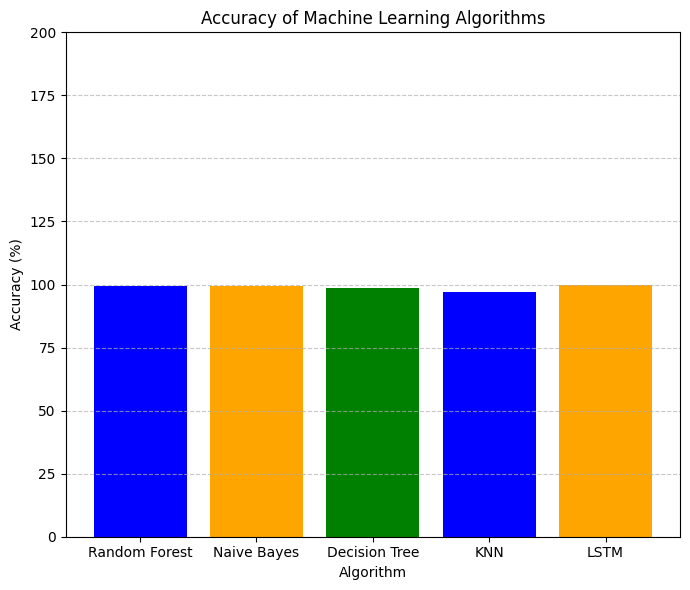

In [ ]:
import matplotlib.pyplot as plt

# Data
algorithm_names = ['Random Forest', 'Naive Bayes', 'Decision Tree','KNN','LSTM']
accuracy_scores = [99.32, 99.55, 98.64,97,99.88]  # Accuracy scores corresponding to the algorithms

# Plotting the bar graph
plt.figure(figsize=(7, 6))
plt.bar(algorithm_names, accuracy_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Machine Learning Algorithms')
plt.ylim(0, 200)  # Set y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

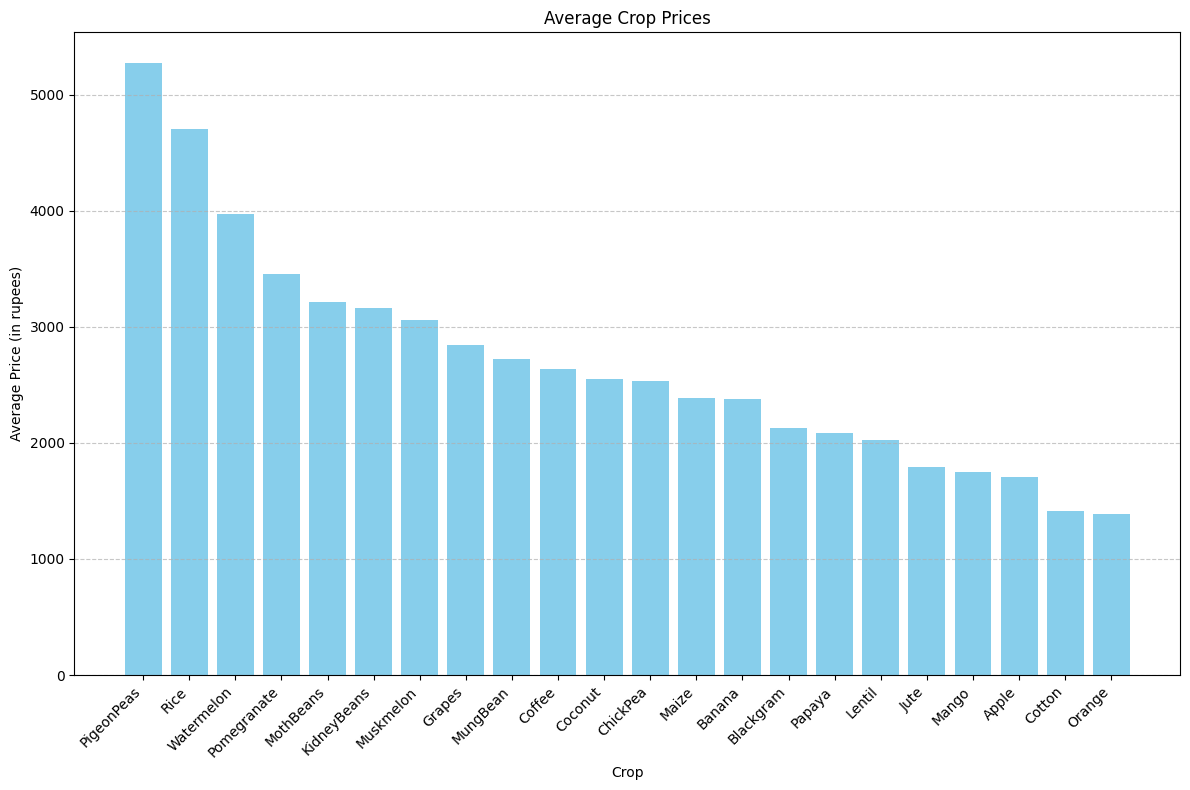

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/indiancrop_datasetwith_via.xlsx')

# Drop rows with missing values in 'CROP' and 'CROP_PRICE' columns
data.dropna(subset=['CROP', 'CROP_PRICE'], inplace=True)

# Group data by crop and calculate the average price
average_prices = data.groupby('CROP')['CROP_PRICE'].mean().reset_index()

# Sort crops by average price
average_prices.sort_values(by='CROP_PRICE', ascending=False, inplace=True)

# Plot the bar graph
plt.figure(figsize=(12, 8))
plt.bar(average_prices['CROP'], average_prices['CROP_PRICE'], color='skyblue')
plt.title('Average Crop Prices')
plt.xlabel('Crop')
plt.ylabel('Average Price (in rupees)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

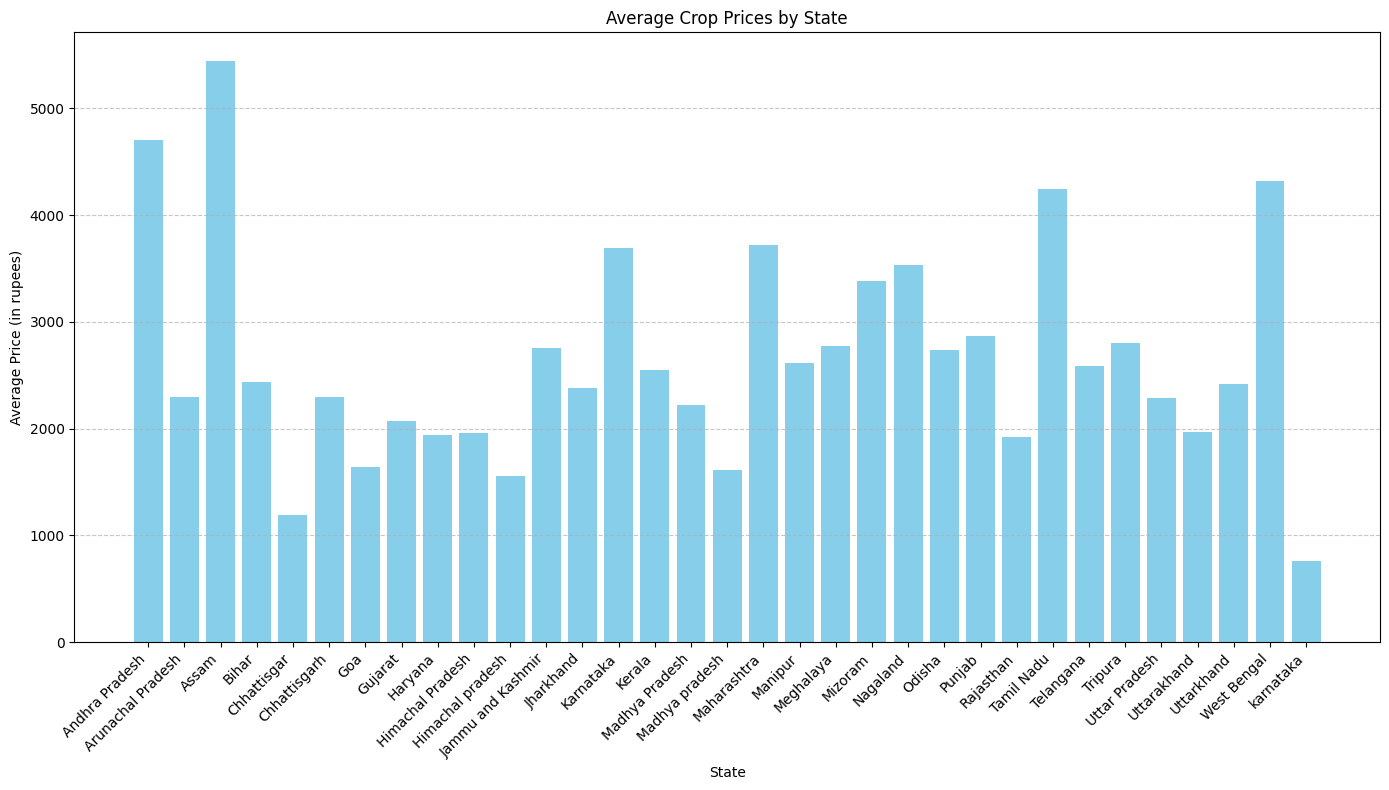

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/indiancrop_datasetwith_via.xlsx')

# Drop rows with missing values in 'DESTINATION' and 'CROP_PRICE' columns
data.dropna(subset=['DESTINATION', 'CROP_PRICE'], inplace=True)

# Group data by state and calculate the average price
average_prices = data.groupby('DESTINATION')['CROP_PRICE'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(average_prices['DESTINATION'], average_prices['CROP_PRICE'], color='skyblue')
plt.title('Average Crop Prices by State')
plt.xlabel('State')
plt.ylabel('Average Price (in rupees)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

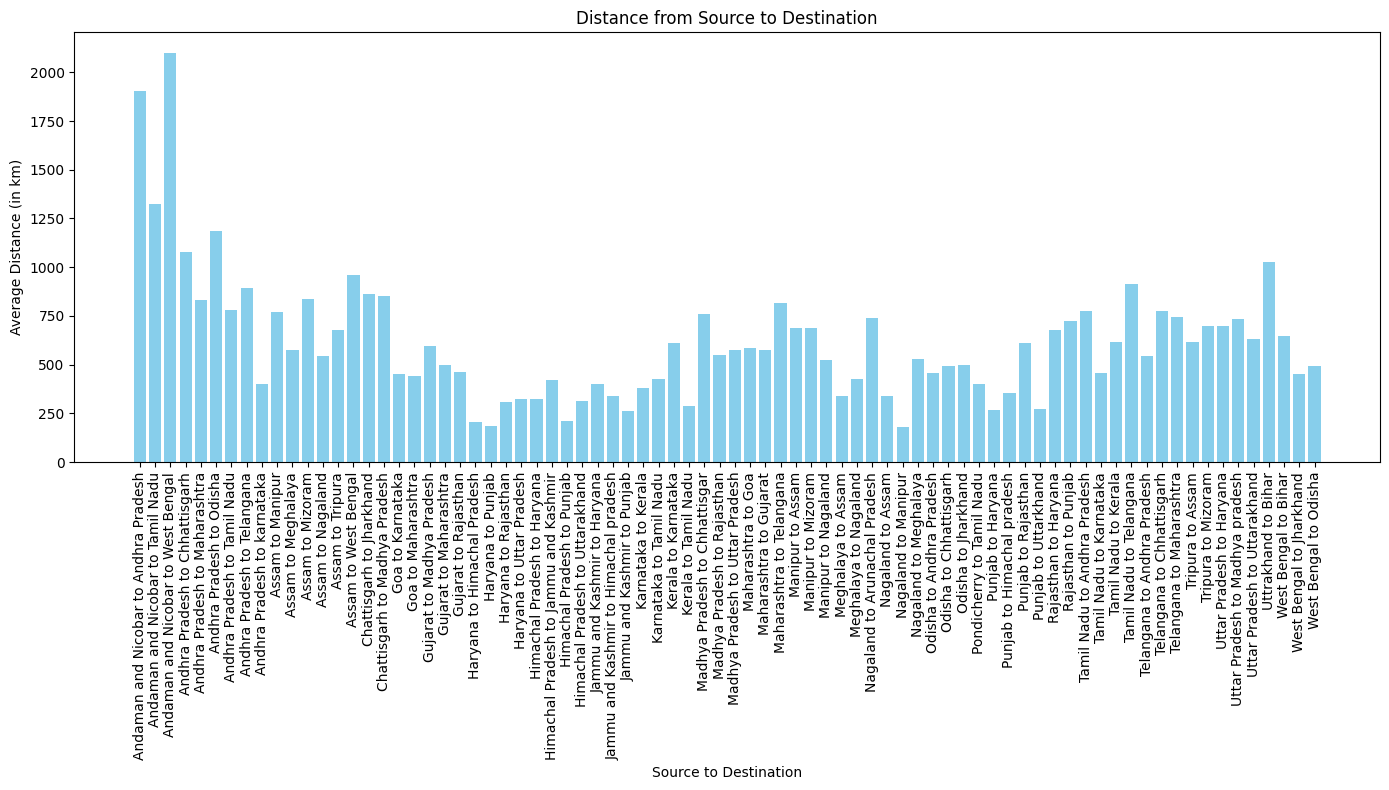

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('/content/indiancrop_datasetwith_via.xlsx')

# Group the data by source-destination pairs and calculate the average distance
source_destination_data = data.groupby(['STATE', 'DESTINATION'])['DISTANCE'].mean().reset_index()

# Plot the bar graph
plt.figure(figsize=(14, 8))
plt.bar(source_destination_data['STATE'] + ' to ' + source_destination_data['DESTINATION'], source_destination_data['DISTANCE'], color='skyblue')
plt.title('Distance from Source to Destination')
plt.xlabel('Source to Destination')
plt.ylabel('Average Distance (in km)')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

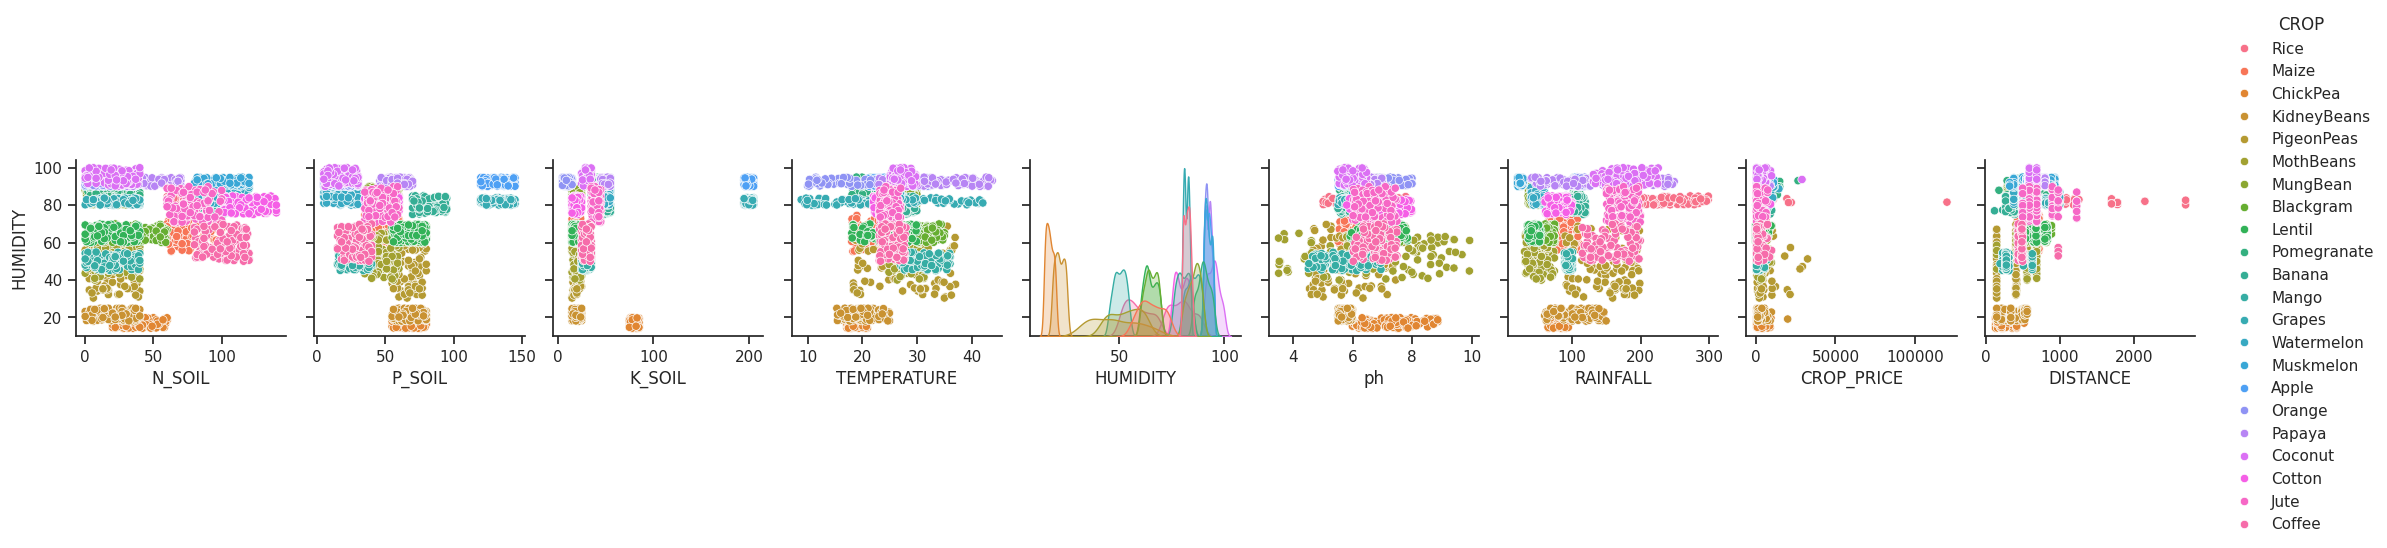

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset from the file path
df = pd.read_excel('/content/indiancrop_datasetwith_via.xlsx')

# Create pairplot with 'HUMIDITY' on the y-axis and 'CROP' as hue
sns.pairplot(df, y_vars=['HUMIDITY'], hue='CROP')

# Show plot
plt.show()


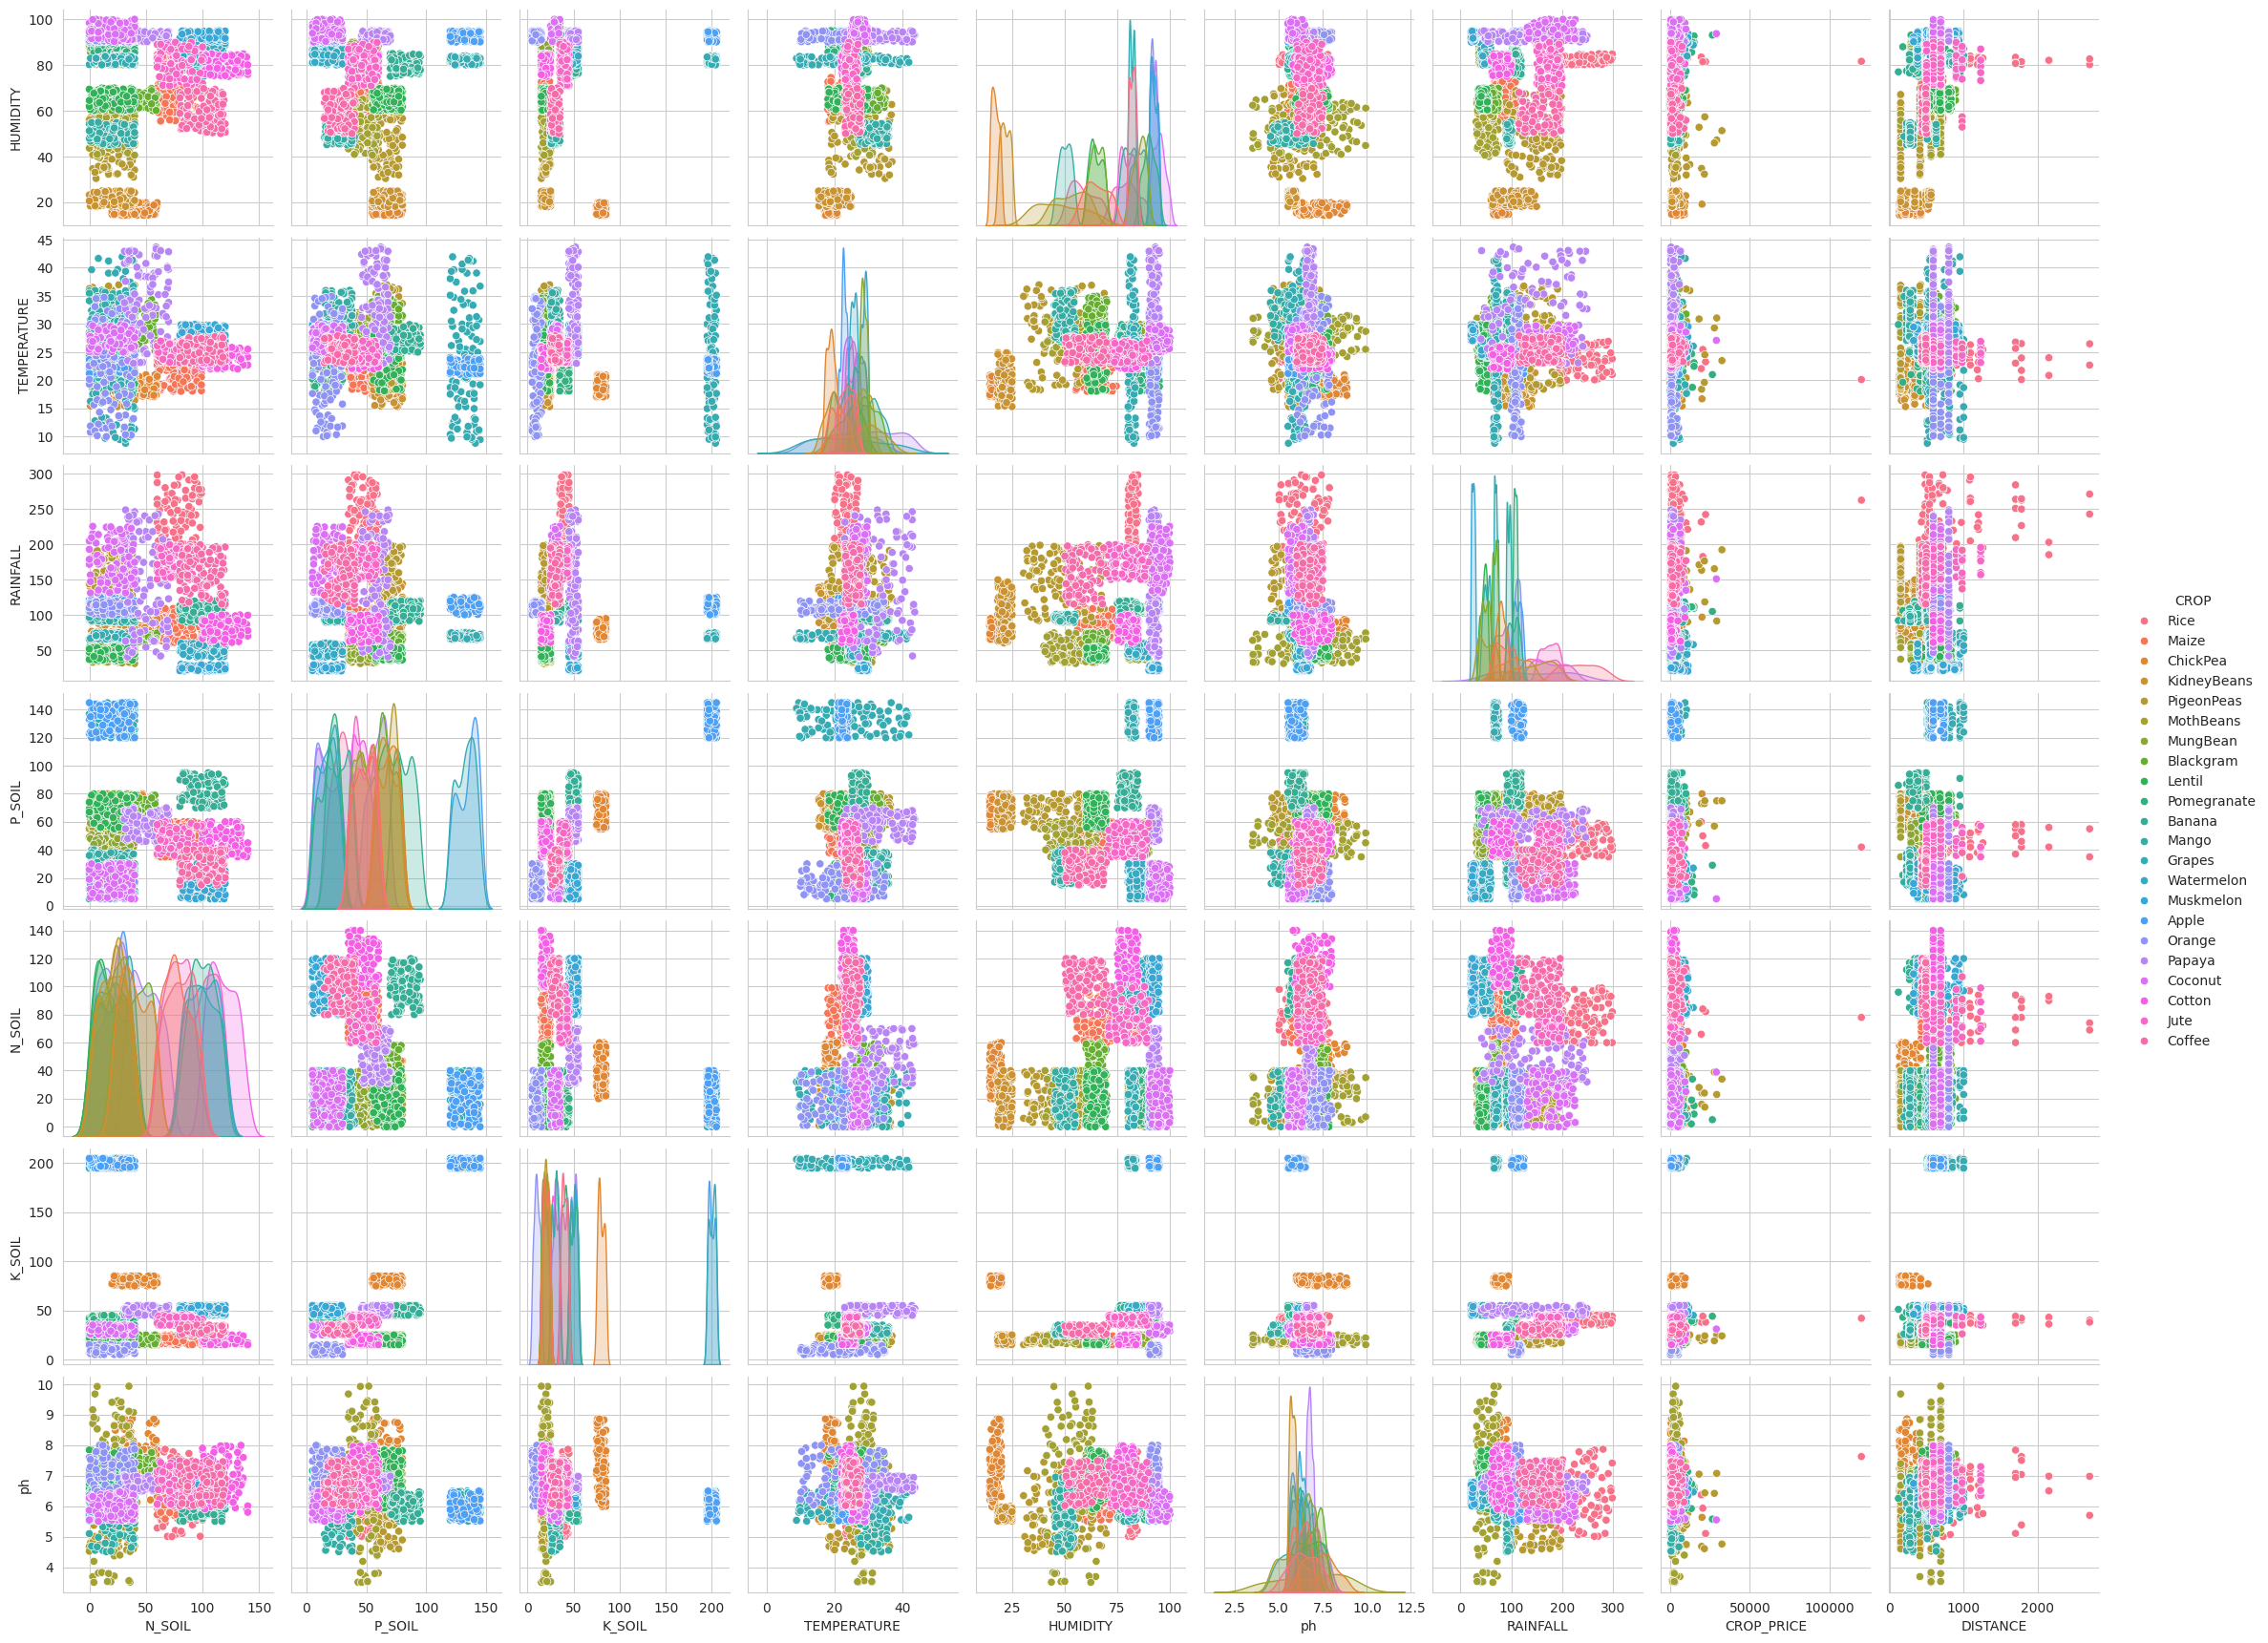

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset from the file path
df = pd.read_excel('/content/indiancrop_datasetwith_via.xlsx')

# Create pairplot with 'HUMIDITY' on the y-axis and 'CROP' as hue
sns.pairplot(df, y_vars=['HUMIDITY','TEMPERATURE','RAINFALL','P_SOIL','N_SOIL','K_SOIL','ph'], hue='CROP')
# sns.pairplot(df, y_vars=[''], hue='CROP')
# sns.pairplot(df, y_vars=['RAINFALL'], hue='CROP')
# sns.pairplot(df, y_vars=['P_SOIL'], hue='CROP')
# sns.pairplot(df, y_vars=['N_SOIL'], hue='CROP')
# sns.pairplot(df, y_vars=['K_SOIL'], hue='CROP')
# sns.pairplot(df, y_vars=['ph'], hue='CROP')
# Show plot
plt.show()